In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
# Load the data for States percentage change of the adoption rates
df = pd.read_csv(
    Path("../../../../data/processed_data/states_percent_change.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (305, 20)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.017942,84.117159,60.000000,-0.704207
1,2017,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.062883,79.673007,100.000000,-3.631869
2,2017,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.123155,84.501309,53.191489,2.813736
3,2017,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.011531,80.616520,50.000000,-0.019068
4,2017,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.592820,88.037038,34.063604,3.415807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.740634,86.930294,84.364821,-0.265726
301,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,1.530320,83.067990,55.838323,-2.439572
302,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.127611,85.129962,90.000000,-0.063077
303,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.286695,83.587159,68.817204,-1.329999


In [3]:
# Calculate the growth rate for electric vehicles and gasoline vehicles
# Obtain the mean, median, and standard deviation for the growth rate (percentage change) of electric vehicles and gasoline vehicles
df = df.groupby('year')[['ev_growth_rate', 'gas_growth_rate']].agg(['mean', 'median', 'std'])
df 

ev_growth_rate                       gas_growth_rate                    
               mean     median        std            mean    median       std
year                                                                         
2017      47.065034  50.000000  26.691064        0.898605  0.627819  1.707151
2018      68.890822  66.666667  31.617258        0.377924  0.214688  1.595798
2019      48.288806  50.000000  17.848303        0.432543  0.196078  1.352319
2020      37.316270  37.254902  11.671568       -0.157609  0.179324  1.660312
2021      55.601092  54.545455  14.964177        3.919171  4.191633  1.888581
2022      73.781921  71.428571  15.712360       -0.137891 -0.125565  1.474566

In [4]:
# Flatten the multi-index columns to single index columns
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df

,ev_growth_rate_mean,ev_growth_rate_median,ev_growth_rate_std,gas_growth_rate_mean,gas_growth_rate_median,gas_growth_rate_std
year,,,,,,
2017,47.065034,50.000000,26.691064,0.898605,0.627819,1.707151
2018,68.890822,66.666667,31.617258,0.377924,0.214688,1.595798
2019,48.288806,50.000000,17.848303,0.432543,0.196078,1.352319
2020,37.316270,37.254902,11.671568,-0.157609,0.179324,1.660312
2021,55.601092,54.545455,14.964177,3.919171,4.191633,1.888581
2022,73.781921,71.428571,15.712360,-0.137891,-0.125565,1.474566


In [5]:
# Rename the columns to be more presentable
stats_df = df.rename(columns={
    'ev_growth_rate_mean': 'EV Growth Rate Mean',
    'ev_growth_rate_median': 'EV Growth Rate Median',
    'ev_growth_rate_std': 'EV Growth Rate Std',
    'gas_growth_rate_mean': 'Gasoline Growth Rate Mean',
    'gas_growth_rate_median': 'Gasoline Growth Rate Median',
    'gas_growth_rate_std': 'Gasoline Growth Rate Std'
})

# Reset the index
stats_df.reset_index(inplace=True)

# Inspect the changes
stats_df

,year,EV Growth Rate Mean,EV Growth Rate Median,EV Growth Rate Std,Gasoline Growth Rate Mean,Gasoline Growth Rate Median,Gasoline Growth Rate Std
0,2017,47.065034,50.000000,26.691064,0.898605,0.627819,1.707151
1,2018,68.890822,66.666667,31.617258,0.377924,0.214688,1.595798
2,2019,48.288806,50.000000,17.848303,0.432543,0.196078,1.352319
3,2020,37.316270,37.254902,11.671568,-0.157609,0.179324,1.660312
4,2021,55.601092,54.545455,14.964177,3.919171,4.191633,1.888581
5,2022,73.781921,71.428571,15.712360,-0.137891,-0.125565,1.474566


In [6]:
# Inspect the data types
stats_df.dtypes

year                             int64
EV Growth Rate Mean            float64
EV Growth Rate Median          float64
EV Growth Rate Std             float64
Gasoline Growth Rate Mean      float64
Gasoline Growth Rate Median    float64
Gasoline Growth Rate Std       float64
dtype: object

In [7]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

In [8]:
# Create a custom funtion to re-use for plotting the growth rates
def plot_growth_rates(df, ax, x, y_mean, y_median, y_std, title, x_label, y_label, mean_color, median_color, std_color):
    # Plot the Mean Growth Rate
    sns.lineplot(data=df, x=x, y=y_mean, label=f'{y_mean} Mean', marker='o', ax=ax, color=mean_color, alpha=0.5)

    # Range within which the growth rate is expected to lie, based on the standard deviation
    x_axis = df[x]
    mean = df[y_mean]
    std = df[y_std]
    ax.fill_between(x_axis, mean - std, mean + std, alpha=0.2, color=std_color, label=f'{y_mean} Std')

    # Plot the Median Growth Rate
    sns.lineplot(data=df, x=x, y=y_median, label=f'{y_median} Median', marker='o', linestyle='--', ax=ax, color=median_color, alpha=0.25)

    # Customize the plot
    ax.set_title(title, title_style)
    ax.set_xlabel(x_label, axis_style)
    ax.set_ylabel(y_label, axis_style)
    ax.legend(title='Growth Rate Type', ncol=2, fontsize='small', title_fontsize='large', shadow=True, labelspacing=1, loc='upper center')

    return ax

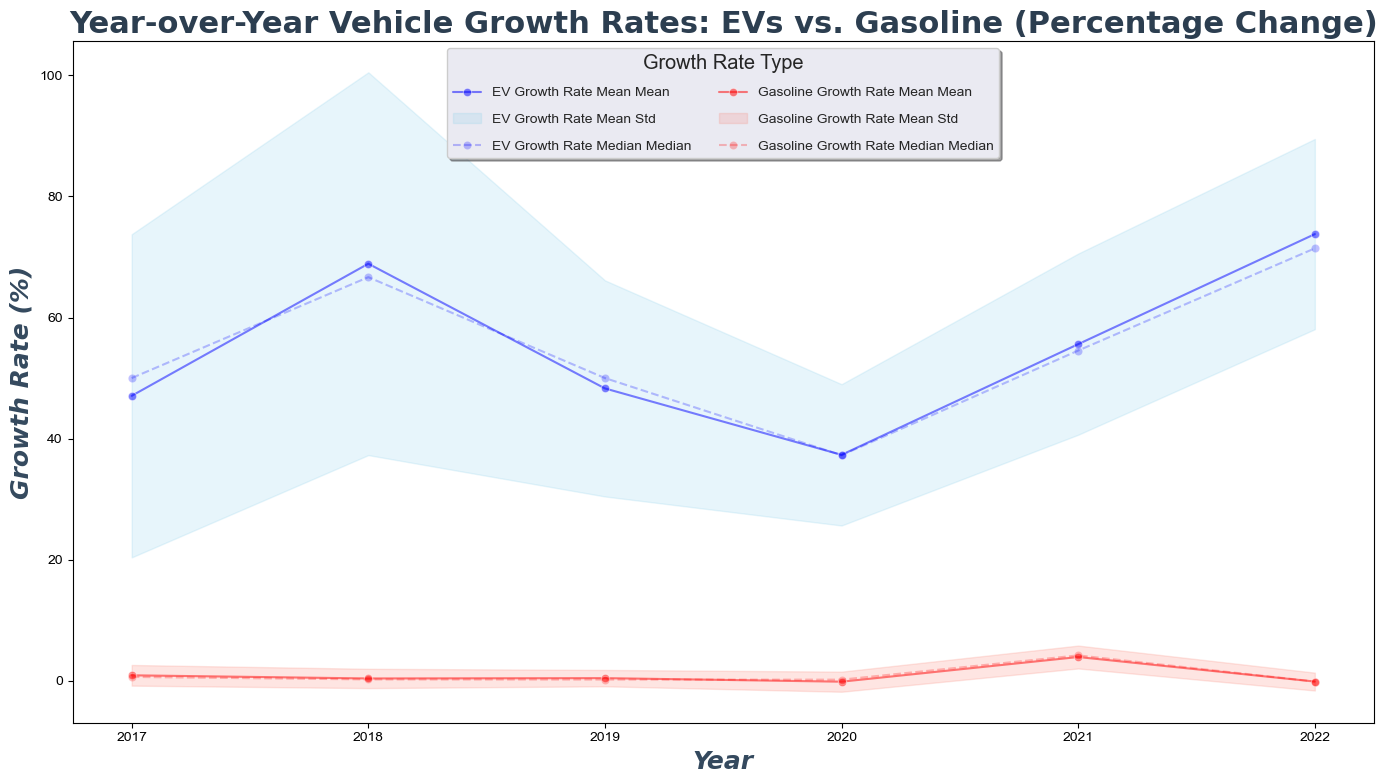

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Plot EV Growth Rates
ax = plot_growth_rates(
    df=stats_df,
    ax=ax,
    x='year',
    y_mean='EV Growth Rate Mean',
    y_median='EV Growth Rate Median',
    y_std='EV Growth Rate Std',
    title='Year-over-Year Growth Rate of EV Vehicles',
    x_label='Year',
    y_label='Growth Rate (%)',
    mean_color='blue',
    median_color='blue',
    std_color='skyblue'
)

# Plot Gasoline Growth Rates
ax = plot_growth_rates(
    df=stats_df,
    ax=ax,
    x='year',
    y_mean='Gasoline Growth Rate Mean',
    y_median='Gasoline Growth Rate Median',
    y_std='Gasoline Growth Rate Std',
    title='Year-over-Year Vehicle Growth Rates: EVs vs. Gasoline (Percentage Change)',
    x_label='Year',
    y_label='Growth Rate (%)',
    mean_color='red',
    median_color='red',
    std_color='salmon'
)

# Save the plot
file_name = f"year_over_year_growth_rate_of_ev_and_gasoline_vehicles.png"
file_path = Path(f"../../../../reports/figures/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()